In [67]:
import pandas as pd
import numpy as np
import urllib.request, json, bs4 as bs, requests
import seaborn as sns
import matplotlib.pyplot
import re

In [9]:
url_for_voting_data = "https://en.wikipedia.org/wiki/California_locations_by_voter_registration"

voting_page = requests.get(url_for_voting_data, timeout = 5)



In [10]:
voting_beautified = bs.BeautifulSoup(voting_page.content, "html.parser")

In [11]:
voting_results_table_raw = voting_beautified.find('table',{'class':'wikitable sortable'})

In [14]:
raw_table_parsed = voting_results_table_raw.find_all('tr')

In [22]:
raw_columns = raw_table_parsed[0].text.split('\n\n')

final_columns = [re.sub("\[.*\]|\n","",k) for k in raw_columns]


In [54]:
raw_rows = [i.text.split('\n') for i in raw_table_parsed[1:]]
rows_with_no_empty_elements = [[re.sub("%|,","",i[j]) for j in range(len(i)) if i[j] != ""] 
                               for i in raw_rows]

final_rows = []

for row in rows_with_no_empty_elements:
    
    next_row = []
    
    for element in row:
        
        try: 
            
            next_row.append(float(element))
        except:
            
            next_row.append(element)
            
    final_rows.append(next_row)
        
        
        
column_values = [[i[j] for i in final_rows] for j in range(len(final_columns))]
       
    
    
    

In [64]:
voting_data_dict = dict(zip(final_columns, column_values))
voting_data = pd.DataFrame(voting_data_dict, columns = final_columns)

In [66]:
voting_data.head(10)

,County,Population,Registered voters,Democratic,Republican,D–R spread,Other,No party preference
0,Alameda,1494876.0,54.6,56.4,14.1,42.3,12.1,19.5
1,Alpine,1167.0,66.1,37.6,30.5,7.1,10.8,25.0
2,Amador,38244.0,56.1,31.7,45.0,-13.3,10.3,17.2
3,Butte,219309.0,55.4,34.4,37.1,-2.7,10.4,21.5
4,Calaveras,45794.0,62.8,30.7,42.5,-11.8,12.3,19.0
5,Colusa,21297.0,36.0,34.4,45.3,-10.9,5.3,17.3
6,Contra Costa,1037817.0,51.1,49.6,24.8,24.8,6.7,21.4
7,Del Norte,28561.0,42.9,34.7,37.5,-2.8,12.0,20.1
8,El Dorado,179878.0,61.3,29.2,43.9,-14.7,10.4,20.3
9,Fresno,920623.0,45.1,40.2,38.2,2.0,7.5,16.8


[Text(0,0.5,'Percent Democrat'), Text(0.5,0,'Log Population')]

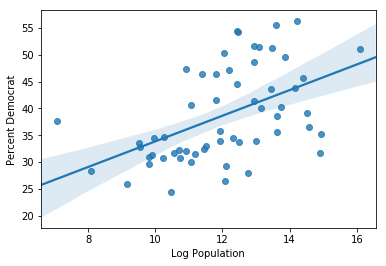

In [73]:
ax = sns.regplot(x = np.log(voting_data['Population']), y = voting_data['Democratic'])

ax.set(xlabel='Log Population', ylabel='Percent Democrat')

In [74]:
voting_data.to_csv('voting_data.csv')